# <font color=red> CMT307 Applied Machine Learning </font>
<a class="anchor" id="main_title" name="main_title"></a>
## Coursework 2021-2022 Autumn semester
### Jose Mendoza - Student ID 21015647

<a class="anchor" id="index" name="index"></a>
# Contents
***

## 1. Q1 
<br/>

#### [1.0. Calculate performance metrics ](#1_1)

<br/>

***
## 2. Q2
#### [2.0.1. Import required libraries ](#2_0_1)
#### [2.0.2. Load data ](#2_0_2)
<br/>

### [2.1 i) Data exploration](#2_1)

#### [2.1.1. Missing values ](#2_1_1)
#### [2.1.2. Descriptive statistics & cardinality ](#2_1_2)
#### [2.1.3. Histogram plot per feature ](#2_1_3)
#### [2.1.4. Boxplot ](#2_1_4)
#### [2.1.5. Feature pairwise analysis](#2_1_5)
#### [2.1.6. Heatmap & correlation analysis ](#2_1_6)
#### [2.1.7. Principal component analysis (PCA) ](#2_1_7)

* * * 

<br/>

### [2.2 ii) Data pre-processing](#2_2)
#### [2.2.1 Train and Test split ](#2_2_1)
#### [2.2.2 Encoding categorical features ](#2_2_2)
#### [2.2.3 Transformers for numerical features ](#2_2_3)
#### [2.2.4 Final preprocessor pipeline ](#2_2_4)

* * * 

<br/>

### [2.3 iii) Model implementation](#2_3)
#### [2.3.1. Logistic regression ](#2_3_1)
#### [2.3.2. Support vector machines (SVM) ](#2_3_2)
#### [2.3.3. Random forest ](#2_3_3)

* * * 

<br/>

### [2.4 Performance evaluation](#2_4)
#### [2.4.1. Performance metrics ](#2_4_1)


* * * 

<br/>

### [2.5 Result analysis and discussion](#2_5)
#### [2.5.1. Discussion ](#2_5_1)

* * * 

<br/>


***
# 1.0. Question 1
## 1.1. Calculate performance metrics <a class="anchor" id="1_1" name="1_1"></a>
#### [Return to index](#main_title)
<br/>

_Your algorithm gets the following results in a classification experiment, where in the table, ‘Id’ is the index number, ‘Target’ is the ground truth that the classifier aims to achieve, ‘Prediction’ is the predicted results. Please compute the confusion matrix, precision, recall, f1-measure and accuracy manually (without the help of your computer/Python, please provide all steps and formulas). Include the process to get to the final results._

| Id | Target | Prediction |
|----|--------|------------|
| 1  |    T   |     T      |
| 2  |    T   |     T      |
| 3  |    T   |     F      |
| 4  |    T   |     T      |
| 5  |    T   |     T      |
| 6  |    T   |     F      |
| 7  |    T   |     T      |
| 8  |    T   |     T      |
| 9  |    T   |     T      |
| 10 |    F   |     F      |
| 11 |    F   |     F      |
| 12 |    F   |     F      |
| 13 |    T   |     T      |
| 14 |    T   |     F      |
| 15 |    T   |     T      |
| 16 |    F   |     F      |
| 17 |    F   |     F      |
| 18 |    F   |     T      |
| 19 |    F   |     T      |
| 20 |    F   |     F      |




$$ Precision = \frac{TP}{TP + FP} = \frac{9}{9 + 2} = 81.8\% $$

<br></br>

$$ Recall = \frac{TP}{TP + FN} = \frac{9}{9 + 3} = 75\% $$

<br></br>

$$ F1 = \frac{2 \cdot Precision \cdot Recall }{Precision + Recall} = \frac{9 + 6}{20} = 75\% $$

<br></br>

$$ Accuracy = \frac{TP + TN}{All} = \frac{9 + 6}{20} = 75\% $$



* * *

| Metric      | Expression                                                      | Result          |
| :---:       |    :----:                                                       |          :---:  |
| Precision   | $$\frac{TP}{TP + FP} = \frac{9}{9 + 2}$$                        | $$81.8\% $$     |
| Recall      | $$\frac{TP}{TP + FN}$$                                          | $$75\% $$       |
| F1          | $$\frac{2 \cdot Precision \cdot Recall }{Precision + Recall}$$  | $$0.78 $$       |
| Accuracy    | $$\frac{TP + TN}{All}$$                                         | $$75\% $$       |



***
# 2.0. Question 2 <a class="anchor" id="2_0" name="2_0"></a>
#### [Return to index](#main_title)
<br/>

_In this question, you will develop machine learning models to predict e-commerce visitors’ purchasing intention. The given dataset Coursework_1_data.csv, which can be downloaded from Learning Central, contains shoppers’ online activity information including clickstream and session information data, where the last column Revenue represents visitors’ purchasing intention. Your tasks will include data exploration, data pre-processing, machine learning method selection and implementation, and model performance evaluation. In addition to aforementioned tasks, you will write a concise report (around 1000 words, excluding tables and figures) to summarise your work and provide an analysis and discussion of the results._
<br/><br/>

* i) **Data exploration** [10%]: _Conduct exploratory inspection of the dataset to provide a good understanding of data characteristics._
* ii) **Data pre-processing** [30%]: _Carry out well thought pre-processing procedures to prepare the data into a form that is likely to lead to better performance._
* iii) **Model implementation** [30%]: _Select three representative classification methods with a clear justification of your choice. Implement and optimise the classifiers for your chosen classification methods._
* iv) **Performance evaluation** [10%]: _Organise the data in a suitable form to ensure the trained classifiers to provide reliable results. Evaluate models using suitable performance metrics._
* v) **Result analysis and discussion** [10%]: _Provide an insightful analysis and comparison on results that you obtained from above steps, draw conclusions based on the results and analysis._

***
## 2.0.1. Import required libraries <a class="anchor" id="2_0_1" name="2_0_1"></a>
#### [Return to index](#main_title)

In [333]:
import warnings
warnings.filterwarnings('ignore')

In [334]:
# conda install -c conda-forge jupyterthemes

# Exploratory data analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

***
## 2.0.2. Load data <a class="anchor" id="2_0_2" name="2_0_2"></a>
#### [Return to index](#main_title)
<br/>

We use python's **pandas** library to load the csv as a **dataframe** object.

In [335]:
df = pd.read_csv('Coursework_1_data.csv')

df.head(15)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


# 2.1. i) Data exploration <a class="anchor" id="2_1" name="2_1"></a>
#### [Return to index](#main_title)
<br/>

| Feature                   | Description                                                     							| Type            |
| :---:                     | :----:                                                       							| :---:           |
| Administrative            | Number of pages visited by the visitor about account management 							| Numerical       |
| Administrative duration   | Total amount of time (in seconds) spent by the visitor on account management related pages 			| Numerical       |
| Informational             | Number of pages visited by the visitor about Web site, communication and address information of the shopping site | Numerical       |
| Informational duration    | Total amount of time (in seconds) spent by the visitor on informational pages  					| Numerical       |
| Product related           | Number of pages visited by visitor about product related pages  							| Numerical       |
| Product related duration  | Total amount of time (in seconds) spent by the visitor on product related pages 					| Numerical       |
| Bounce rate               | Average bounce rate value of the pages visited by the visitor 							| Numerical       |
| Exit rate                 | Number of pages visited by the visitor about account management 							| Numerical       |
| Page value                | Average page value of the pages visited by the visitor 								| Numerical       |
| Special day               | Closeness of the site visiting time to a special day 								| Numerical       |
| * * * 		    | * * * 														| * * *           |
| OperatingSystems          | Operating system of the visitor 											| Categorical     |
| Browser                   | Browser of the visitor 												| Categorical     |
| Region                    | Geographic region from which the session has been started by the visitor 						| Categorical     |
| TrafficType               | Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct) 			| Categorical     |
| VisitorType               | Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’ 						| Categorical     |
| Weekend                   | Boolean value indicating whether the date of the visit is weekend 						| Categorical     |
| Month                     | Month value of the visit date 											| Categorical     |
| Target                    | Revenue Class label indicating whether the visit has been finalized with a transaction 				| Categorical     |
    

In [336]:
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

categorical_features = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Month']

In [337]:
print('Dataset entries: ', len(df))

Dataset entries:  12330


***
## 2.1.1. Missing values <a class="anchor" id="2_1_1" name="2_1_1"></a>
#### [Return to index](#main_title)

In [338]:
# Check wheter there are missing values within the dataset

if df.isnull().values.any():
    print('Missing values found in the dataset.\n')
    
else:
    print('The dataset does not contain missing values.\n')

The dataset does not contain missing values.



***
## 2.1.2. Descriptive statistics & cardinality <a class="anchor" id="2_1_2" name="2_1_2"></a>
#### [Return to index](#main_title)

In [339]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [340]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [341]:
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

#df_numerics = df.select_dtypes(include=numerics)

In [342]:
df_numeric = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']]


df_numeric.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


### Cardinality in categorical columns

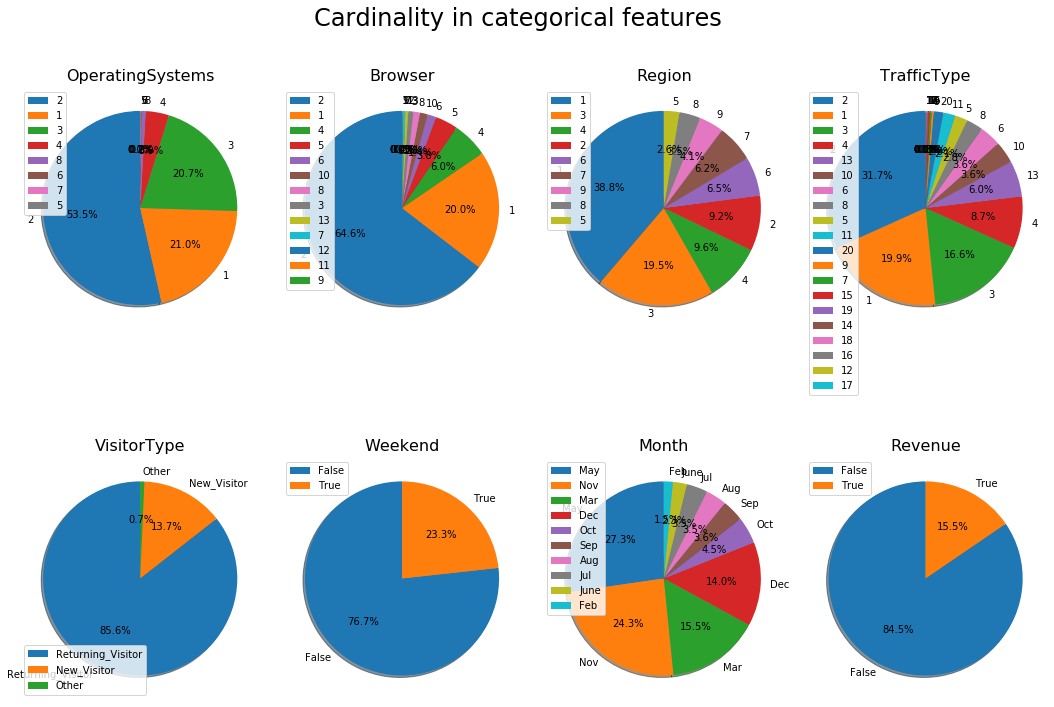

In [343]:
fig = plt.figure(figsize = (25,25))

axes = [category + "_ax" for category in df_cat.columns]

for i in range(len(df_cat.columns)):
      
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = df_cat[df_cat.columns[i]].value_counts().index
    sizes = df_cat[df_cat.columns[i]].value_counts().values
    #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    
    axes[i] = fig.add_subplot(round(len(df_cat.columns)), 4,i+1)
    

    axes[i].pie(sizes, 
            #explode=explode, 
            labels=labels, 
            autopct='%1.1f%%',
            shadow=True, 
            startangle=90)
    
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    fig.set_figheight(40)
    fig.set_figwidth(15)
    
    ax1.legend(labels)
    axes[i].set_title(df_cat.columns[i], fontsize = 16)
    axes[i].legend(loc="best")


#fig.subplots_adjust(hspace=1.2)
#fig.subplots_adjust(hspace=0.6)

fig.suptitle("Cardinality in categorical features", fontsize=24, y= 1.02)
fig.tight_layout()

plt.show()

In [344]:
df_cat = df[['OperatingSystems',
'Browser',
'Region',
'TrafficType',
'VisitorType',
'Weekend',
'Month',
'Revenue']]

for column in df_cat.columns:
    print("\n" + column + ":\n")
    print(df_cat[column].value_counts())


OperatingSystems:

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Browser:

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Region:

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

TrafficType:

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

VisitorType:

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Weekend:

False    9462
True     2868
Name: Weekend, dtype: int64

Month:

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug  

***
## 2.1.3. Histogram plot per feature <a class="anchor" id="2_1_3" name="2_1_3"></a>
#### [Return to index](#main_title)

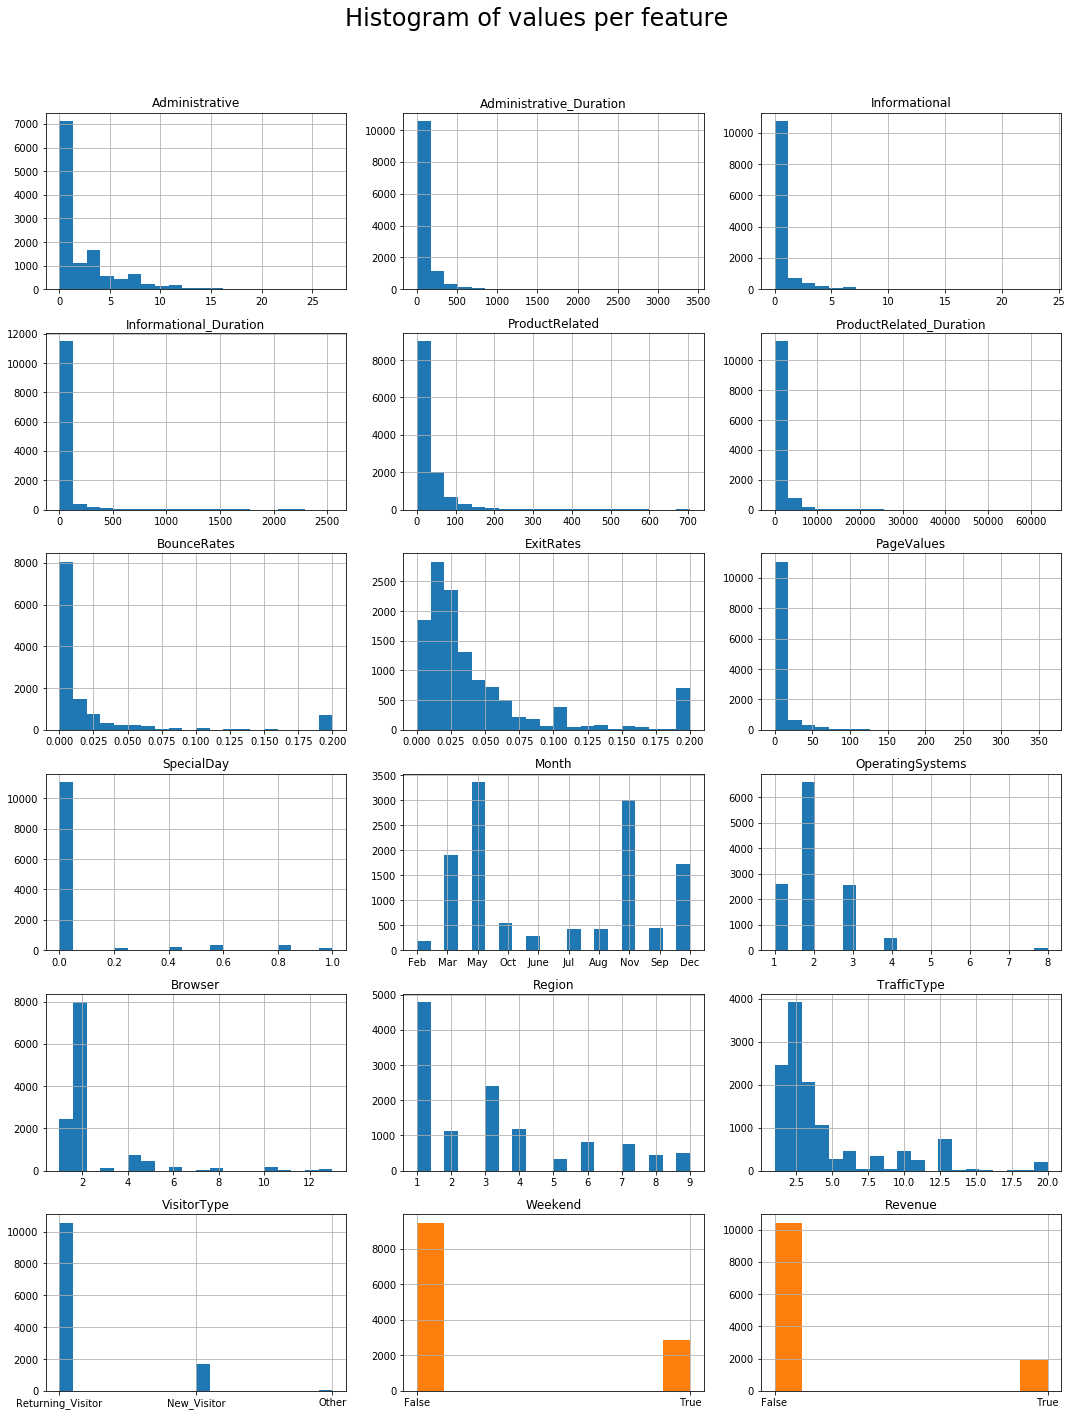

In [345]:
fig = plt.figure(figsize = (15,55))


for i in range(len(df.columns)):
      
    fig.add_subplot(round(len(df.columns)),3,i+1)
    plt.title(str(df.columns[i]))
    
    try:  
        df[df.columns[i]].hist(bins = 20)
    except:
        df[df.columns[i]].map({True: 'True', False: 'False'}).hist()
        
            
fig.suptitle("Histogram of values per feature", fontsize=24, y= 1.02)

plt.tight_layout()
plt.show()

***
## 2.1.4. Boxplot <a class="anchor" id="2_1_4" name="2_1_4"></a>
#### [Return to index](#main_title)

In [346]:
numeric_features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

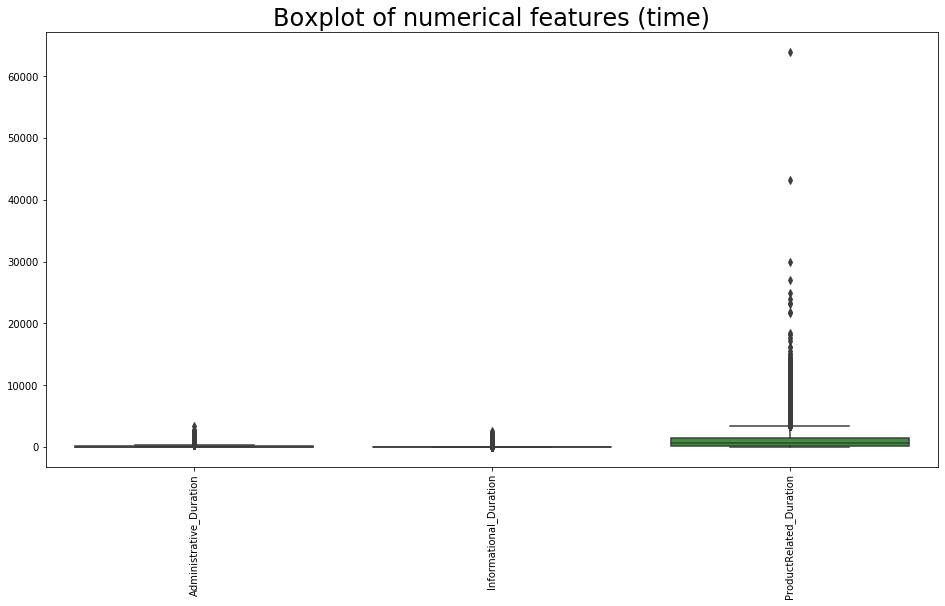

In [347]:
plt.figure(figsize = (16,8))

time_features = [feature for feature in numeric_features if ('Duration' in feature)]

sns.boxplot(data = df_numeric[time_features])

plt.xticks(rotation = 90)

plt.title("Boxplot of numerical features (time)", fontsize=24)

plt.show()

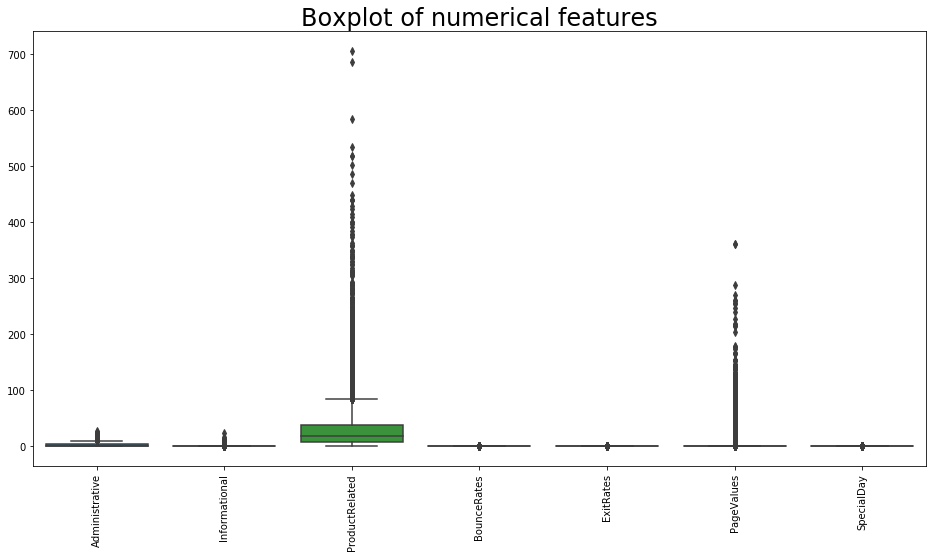

In [348]:
plt.figure(figsize = (16,8))

non_time_features = [feature for feature in df_numeric.columns if ('Duration' not in feature)]

sns.boxplot(data = df_numeric[non_time_features])

plt.xticks(rotation = 90)

plt.title("Boxplot of numerical features", fontsize=24)

plt.show()

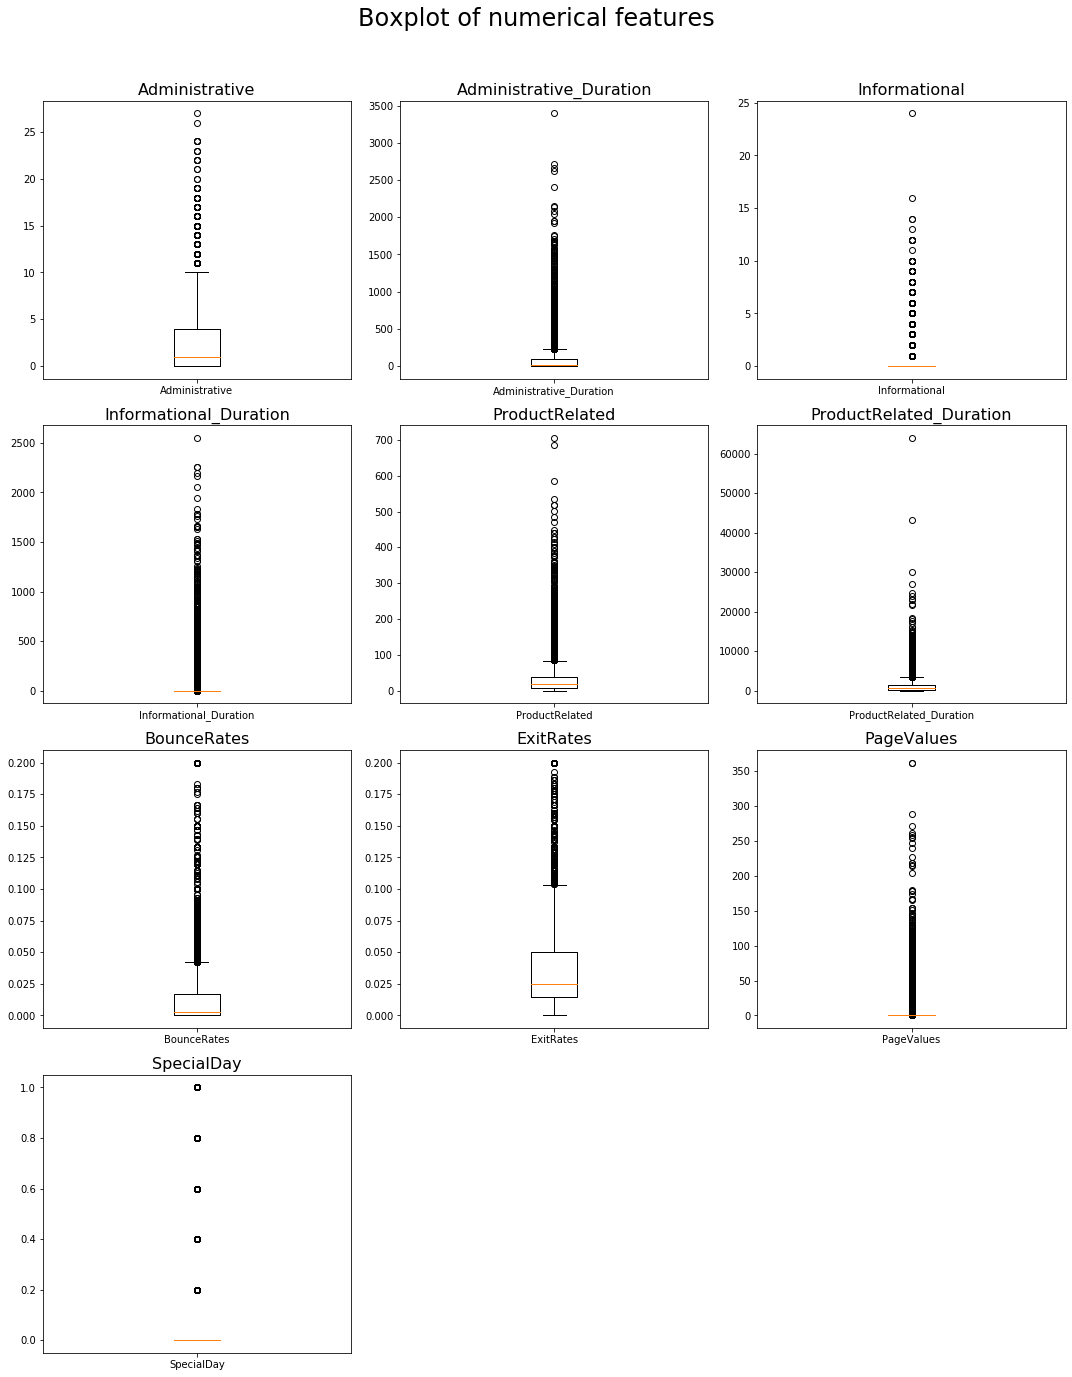

In [349]:
axes = [category + "_ax" for category in df_numeric.columns]

fig = plt.figure(figsize = (15, 45))


for i in range(len(df_numeric.columns)):
          
    axes[i] = fig.add_subplot(round(len(df_numeric.columns)), 3,i+1)

    #sns.boxplot(x = df_numeric[df_numeric.columns[i]] , ax = axes[i], color = "skyblue", orient = "v")
    axes[i].boxplot(df_numeric[df_numeric.columns[i]])
    
    axes[i].set_title(df_numeric.columns[i], fontsize = 16)
    axes[i].set_xticklabels([df_numeric.columns[i]], rotation = 0)
            
fig.suptitle("Boxplot of numerical features", fontsize=24, y= 1.02)


plt.tight_layout()
plt.show()

***
## 2.1.5. Feature pairwise analysis <a class="anchor" id="2_1_5" name="2_1_5"></a>
#### [Return to index](#main_title)

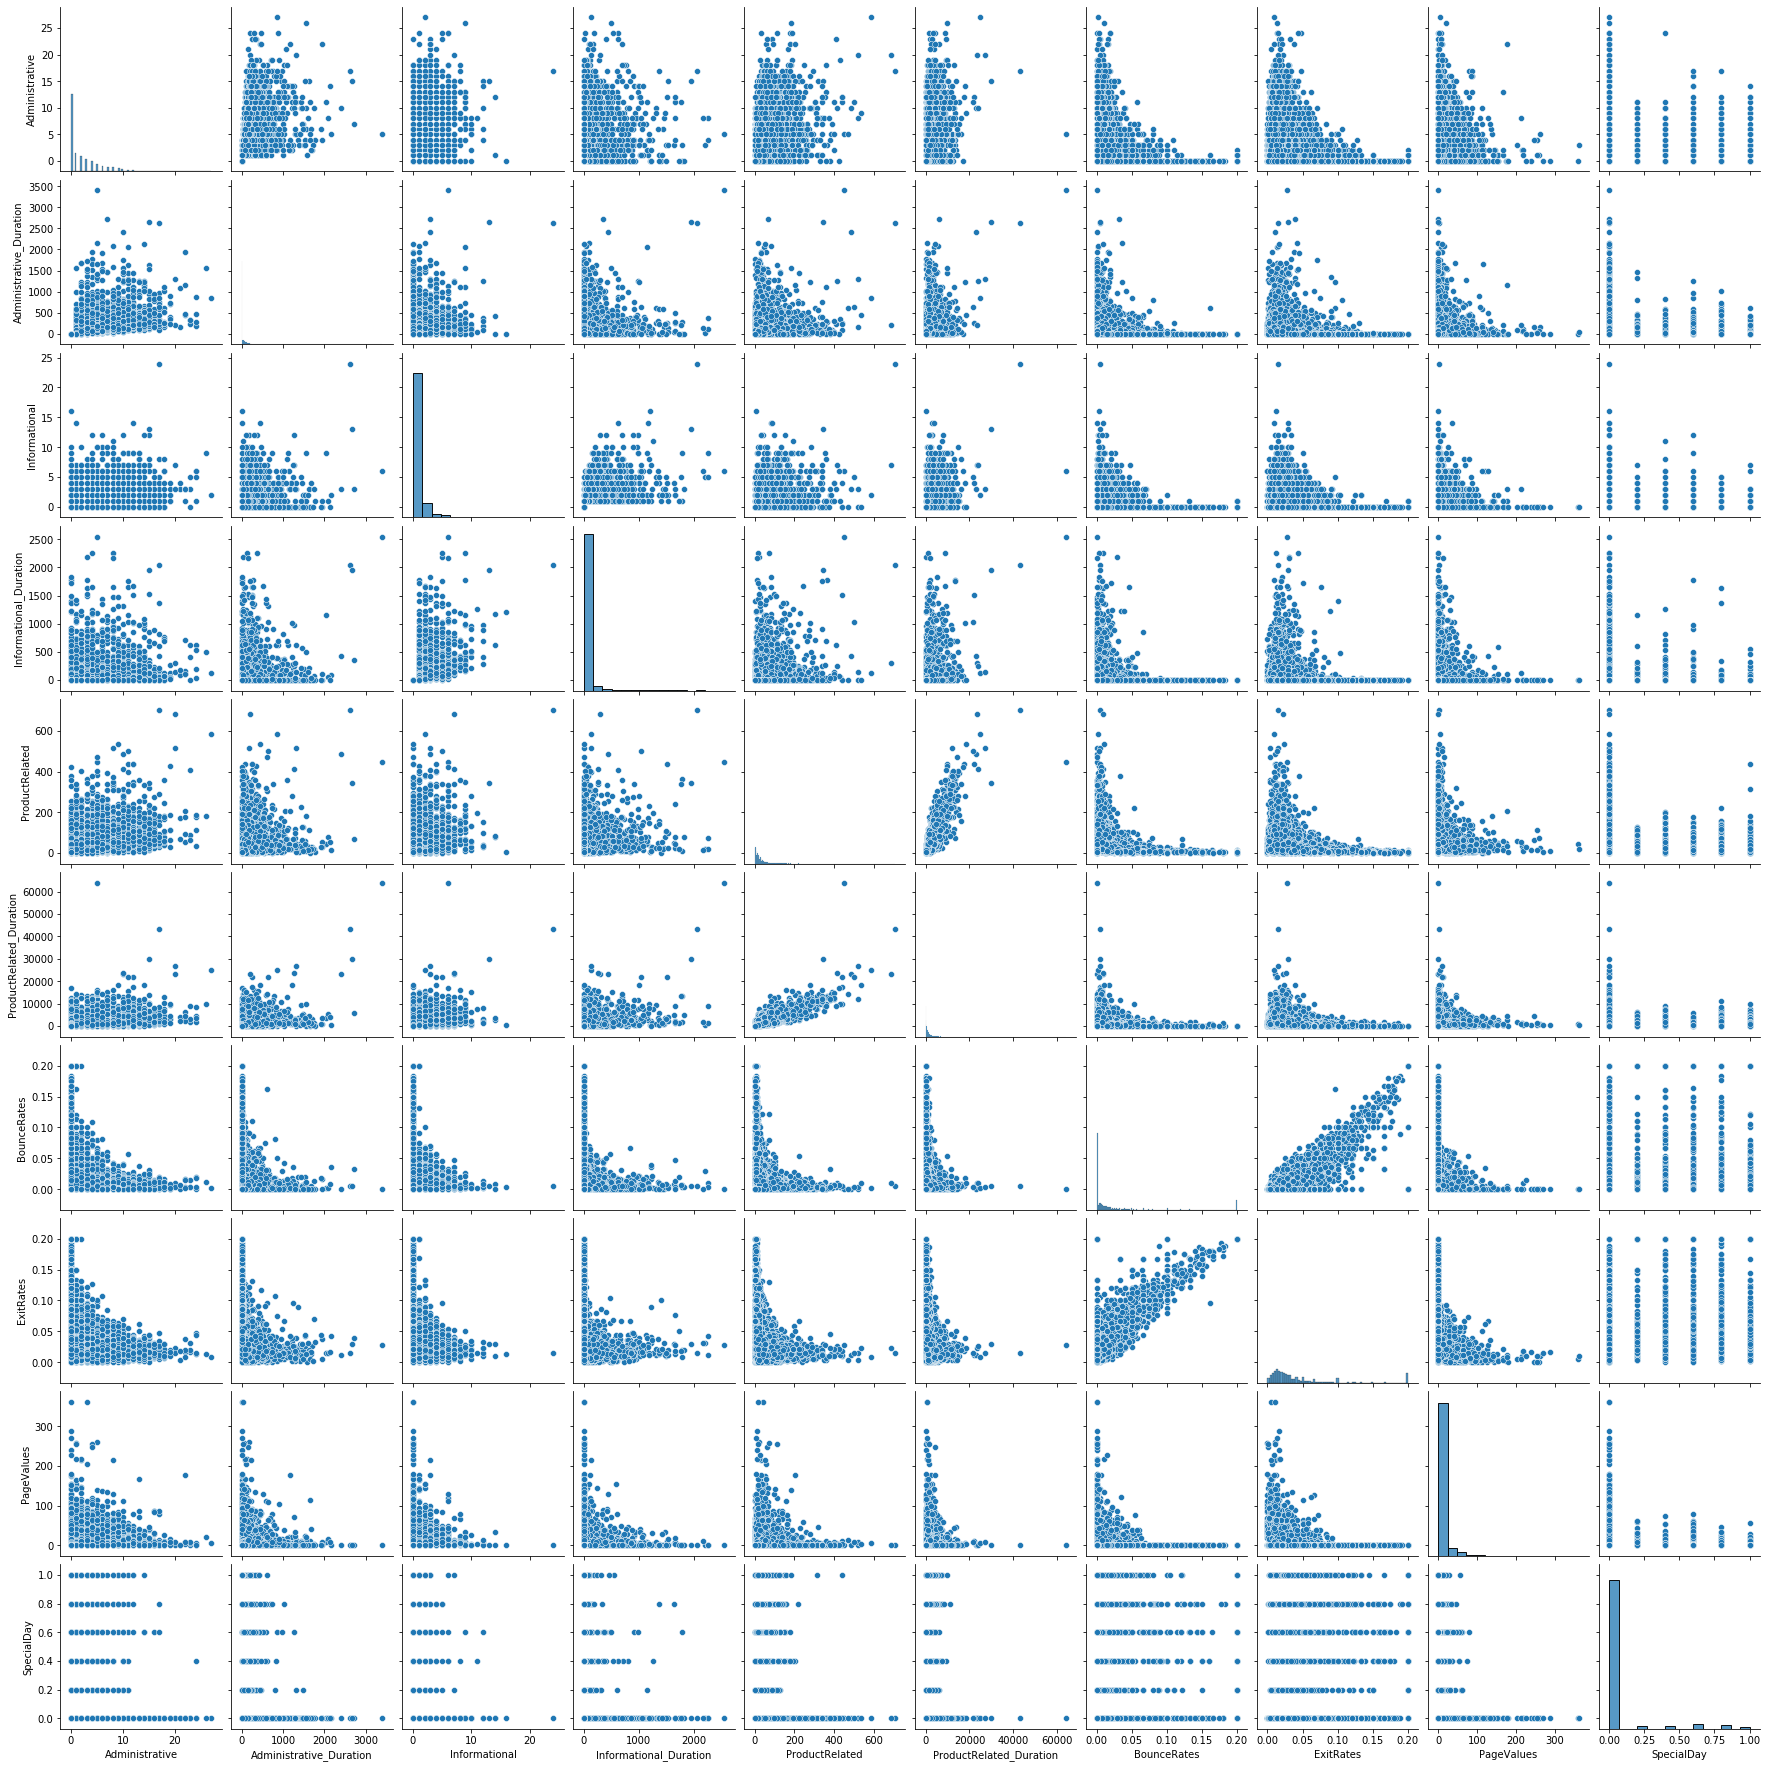

In [350]:
sns.pairplot(df_numeric)
plt.show()

***
## 2.1.6. Heatmap & correlation analysis <a class="anchor" id="2_1_6" name="2_1_6"></a>
#### [Return to index](#main_title)

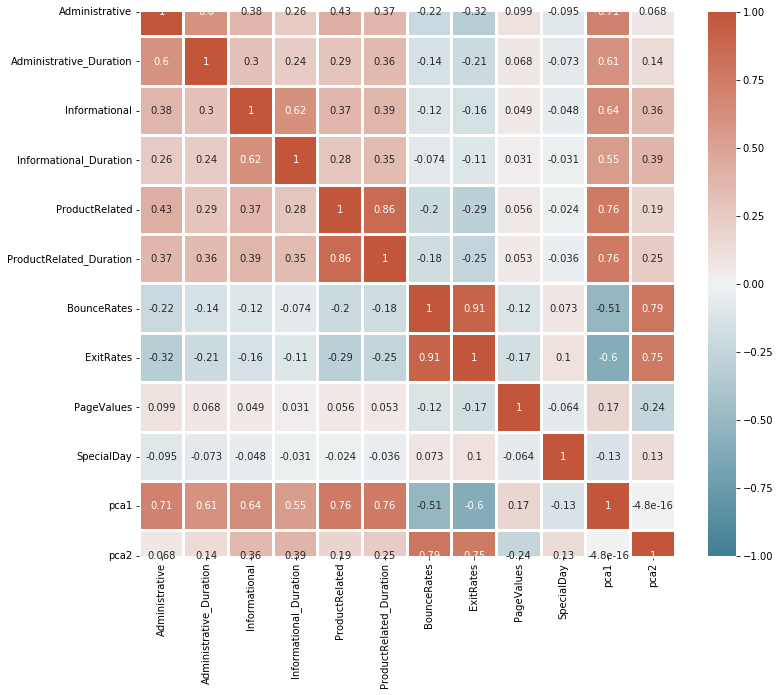

In [395]:
# Diverging palette
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12,10))
red_blue = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(correlation_matrix, linewidths=2, vmin = -1, vmax = 1, cmap=red_blue, annot = True)
#sns.heatmap(correlation_matrix, linewidths=2, vmin = 0, vmax = 1,  cmap='Reds', square=True)

plt.show()

***
## 2.1.7. Principal component analysis (PCA) <a class="anchor" id="2_1_7" name="2_1_7"></a>
#### [Return to index](#main_title)

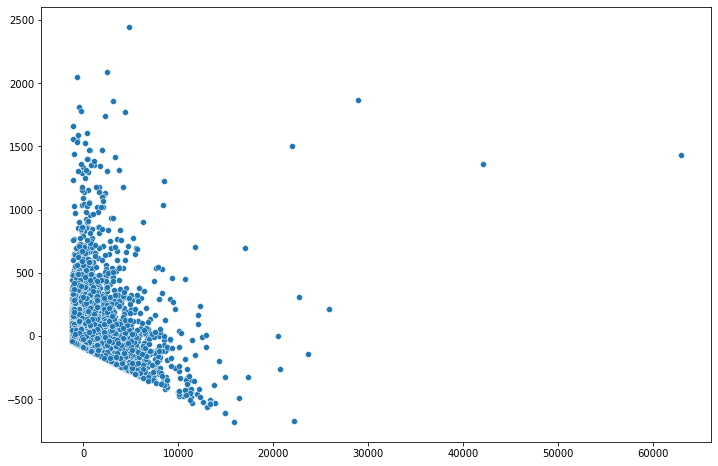

In [352]:
from sklearn.decomposition import PCA

fig = plt.figure(figsize = (12,8))

pca = PCA(n_components = 2)
df_2D = pca.fit_transform(df_numeric)

sns.scatterplot(df_2D[:,0], df_2D[:,1])
plt.show()

Features:  Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')
Eigenvalues length: 10, Original Number of Features: 10
(10,) (10, 10)


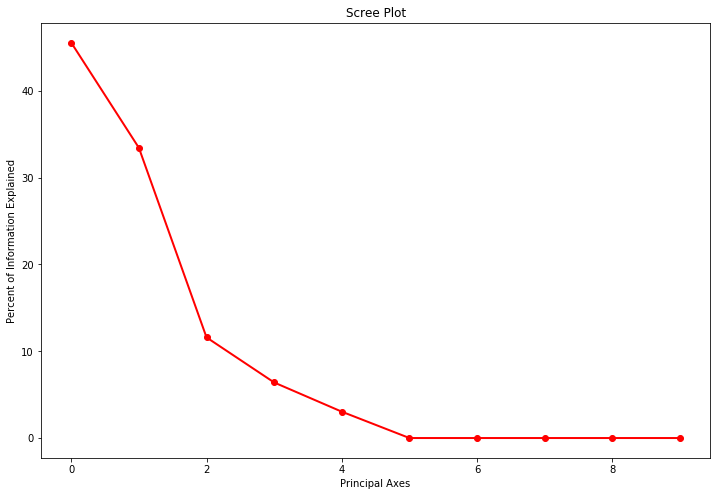

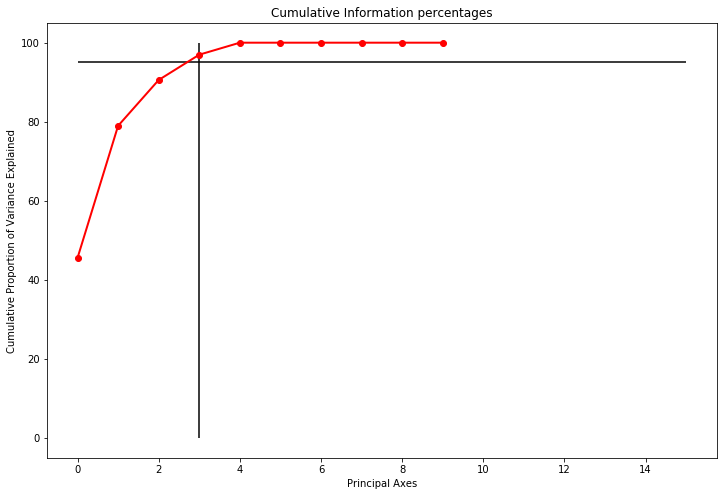

In [353]:
# Extract the class classes
classes = df['Revenue']
data_matrix = df_numeric #df.drop(columns='class')

print('Features: ', data_matrix.columns)

# Perform eigendecomposition using `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

# Order the eigenvalues by ordering the indices of the eigenvalues using `argsort`, 
# and use [::-1] to order them from greatest to smallest
indices = eigenvalues.argsort()[::-1]  
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]

print(eigenvalues.shape, eigenvectors.shape)

# Find the variance/information percentages for each eigenvalue.
# Find the percentages of information for each eigenvector, which is generated by the proportion of its eigenvalues 
# to the sum of all eigenvalues
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

# Plot the principal axes vs the information proportions for each principal axis
plt.figure(figsize=(12, 8))
plt.plot(information_percents, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Axes')
plt.ylabel('Percent of Information Explained')
plt.show()


# Find the cumulative variance/information percentages for each eigenvalue.
# Find the cumulative sum of the percentages
cumulative_information_percents = np.cumsum(information_percents)

# Plot the cumulative percentages array
plt.figure(figsize=(12, 8))
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

# Also plot a horizontal line indicating the 95% mark, and a vertical line for the third principal axis
plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=100)
plt.title('Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

In [354]:
data_matrix_standardized

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,-0.624322,3.667040,3.229185,-0.317165,-0.308809
1,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.590879,-0.457664,1.171425,-0.317165,-0.308809
2,-0.696965,-0.457173,-0.396462,-0.244921,-0.690975,-0.624322,3.667040,3.229185,-0.317165,-0.308809
3,-0.696965,-0.457173,-0.396462,-0.244921,-0.668491,-0.622929,0.573512,1.994529,-0.317165,-0.308809
4,-0.696965,-0.457173,-0.396462,-0.244921,-0.488617,-0.296418,-0.045194,0.142545,-0.317165,-0.308809
...,...,...,...,...,...,...,...,...,...,...
12325,0.206164,0.363060,-0.396462,-0.244921,0.478208,0.307809,-0.310354,-0.288954,0.342111,-0.308809
12326,-0.696965,-0.457173,-0.396462,-0.244921,-0.601038,-0.380942,-0.457664,-0.447346,-0.317165,-0.308809
12327,-0.696965,-0.457173,-0.396462,-0.244921,-0.578554,-0.528041,1.260962,0.897057,-0.317165,-0.308809
12328,0.507207,-0.032915,-0.396462,-0.244921,-0.376195,-0.443518,-0.457664,-0.453122,-0.317165,-0.308809


In [355]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Number of features in the data matrix: 10
Number of features in the principal components: 10
Number of Principal Components Features: 2
Number of Original Data Features: 10


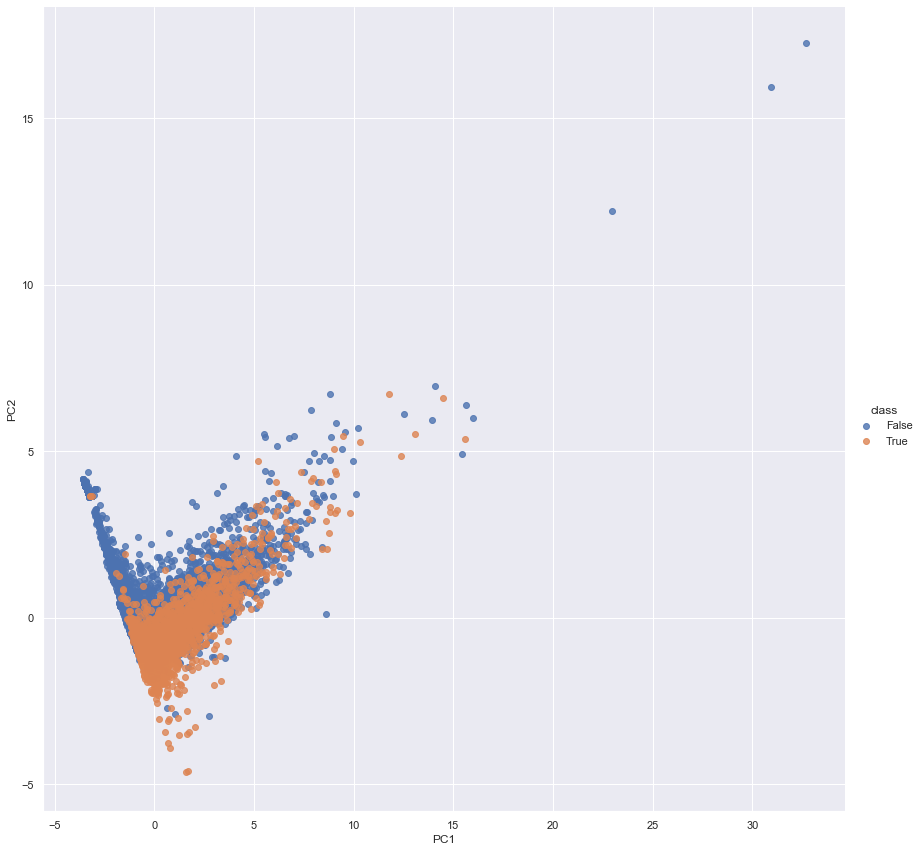

In [411]:
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


classes = df['Revenue']
data_matrix = df[numeric_features].fillna(0)


# Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd
data_matrix_standardized = data_matrix_standardized.fillna(0)


# Perform PCA by fitting and transforming the data matrix.
pca = PCA()

# Fit the standardized data and calculate the principal components
principal_components = pca.fit_transform(data_matrix_standardized)
print(f'Number of features in the data matrix: {principal_components.shape[1]}')
print(f'Number of features in the principal components: {data_matrix.shape[1]}')


# Task 3: Calculate the eigenvalues from the singular values and extract the eigenvectors.
# Find the eigenvalues from the singular values
singular_values = pca.singular_values_
eigenvalues = singular_values ** 2

# Eigenvectors are in the property `.components_` as row vectors. 
# To turn them into column vectors, transpose them using the NumPy method `.T`.
eigenvectors = pca.components_.T


# Extract the variance ratios, which are equivalent to the eigenvalue proportions we calculated earlier.
# Get the variance ratios from the `explained_variance_ratio_`
principal_axes_variance_ratios = pca.explained_variance_ratio_
principal_axes_variance_percents = principal_axes_variance_ratios * 100


# Task 5: Perform PCA once again but with 2 components
# Calculating principal components with 2 components
# Initialize a PCA object with 2 components
pca = PCA(n_components=2) 
 
# Fit the standardized data and calculate the principal components
principal_components = pca.fit_transform(data_matrix_standardized.fillna(0))
 
# Print the DataFrame
print(f'Number of Principal Components Features: {principal_components.shape[1]}')
print(f'Number of Original Data Features: {data_matrix_standardized.shape[1]}')


# Plot the principal components and have its class as its hue to see if clustering of any kind has occured.
# Plot the principal components as a scatterplot
principal_components_data = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'class': classes,
})

#figure = plt.figure(figsize=(25,25))


sns.lmplot(x='PC1', y='PC2', data=principal_components_data, hue='class', fit_reg=False, height = 12)
#sns.set(rc={"figure.figsize":(25, 45)})

plt.show()


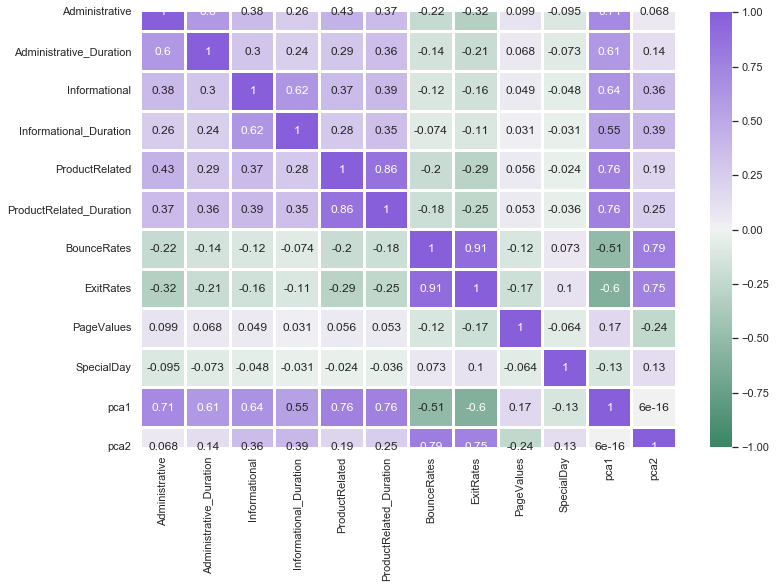

In [409]:
df_pca = df_numeric
df_pca['pca1'] = principal_components_data.PC1
df_pca['pca2'] = principal_components_data.PC2
correlation_matrix_pca = df_pca.corr()

plt.figure(figsize=(12,8))
red_blue = sns.diverging_palette(150, 275, as_cmap=True)


sns.heatmap(correlation_matrix_pca, linewidths=2, vmin = -1, vmax = 1, cmap=red_blue, annot=True)
#sns.heatmap(correlation_matrix, linewidths=2, vmin = 0, vmax = 1,  cmap='Reds', square=True)

plt.show()

In [357]:
# We will use the one-hot-encoded classes as the y
y = classes.astype('category').cat.codes
 

# Fit the transformed features onto the classifier and generate a score.
# Get principal components with 2 features 
# Perform PCA using 2 components
pca_1 = PCA(n_components=2) 
 
# Use the principal components as X and split the data into 33% testing and the rest training
X = pca_1.fit_transform(data_matrix_standardized) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train) 
 
# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 2 PCA features: {score_1}')


# Now, fit the classifier with the first two feture of the original data matrix and generate a score. 
# Notice the large difference in scores!

# Using the original features 
# Select two features from the original data
first_two_original_features = [0, 1]
X_original = data_matrix_standardized.iloc[:, first_two_original_features]
 
# Split the data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)
 
# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with 2 randomly selected features: {score_2}')

Score for model with 2 PCA features: 0.8500860162202015
Score for model with 2 randomly selected features: 0.8441877611206685


***
# 2.2 Data Preprocessing <a class="anchor" id="2_2" name="2_2"></a>
#### [Return to index](#main_title)

In [358]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
#from imblearn.pipeline import Pipeline

#from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, FunctionTransformer, RobustScaler
from sklearn.compose import ColumnTransformer
#from sklearn.compose import make_column_transformer

from sklearn.metrics import accuracy_score

***
## 2.2.1. Train and Test split <a class="anchor" id="2_2_1" name="2_2_1"></a>
#### [Return to index](#main_title)

In [359]:
X = df.drop(['Revenue'], axis=1) # Input features
#X = df_numeric
Y = df[['Revenue']] # Response

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

***
## 2.2.2. Encoding categorical features <a class="anchor" id="2_2_2" name="2_2_2"></a>
#### [Return to index](#main_title)

In [360]:
# transformer for categorical features

categorical_features = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Month']

categorical_transformer = Pipeline(
    [
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

***
## 2.2.3. Transformers for numerical features <a class="anchor" id="2_2_3" name="2_2_3"></a>
#### [Return to index](#main_title)

In [361]:
# transformer for numerical features

numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

minmax_transformer = Pipeline(
    [
        ('minmax', MinMaxScaler())
    ]
)

logger_transformer = Pipeline(
    [
        ('logger', FunctionTransformer(np.log1p))
    ]
)

# RobustScaler transforms the feature vector by subtracting the median and then dividing by the interquartile range 
# (75% value — 25% value)

robust_transformer = Pipeline(
    [
        ('robust', RobustScaler())
    ]
)

In [362]:
df_test = robust_transformer.fit_transform(df_numeric)

df_test2 = logger_transformer.fit_transform(df_test)

df_test3 = minmax_transformer.fit_transform(df_test2)

df_test3

array([[0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 1.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.04, 0.02, 0.  , 0.78, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 1.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.56, 0.89, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.14, 0.14, 0.33, 0.58, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.22, 0.04, 0.28, 0.4 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 1.  , 1.  , 0.  , 0.49],
       [0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.04, 0.01, 0.  , 0.78, 0.  , 0.85],
       [0.  , 0.  , 0.  , 0.  , 0.05, 0.16, 0.  , 0.38, 0.  , 0.49],
       [0.  , 0.  , 0.  , 0.  , 0.05, 0.1 , 0.  , 0.66, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.2 , 0.1 , 0.31, 0.41, 0.  , 0.49],
       [0.  , 0.  , 0.  , 0.  , 0.11, 0.08, 0.  , 0.44, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.09, 0.03, 0.  , 0.66, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.

***
## 2.2.4. Final preprocessor pipeline <a class="anchor" id="2_2_4" name="2_2_4"></a>
#### [Return to index](#main_title)

In [363]:
# combine all transformers in a single ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        
        ('minmax', minmax_transformer, numeric_features),
        ('logger', logger_transformer, numeric_features),
        ('robust', robust_transformer, numeric_features)
    ],
    remainder = 'drop'
)



In [364]:
# Visualize pre-processed dataset (VISUALIZATION ONLY) :

df_processed = preprocessor.fit_transform(df)

np.set_printoptions(threshold=np.inf, linewidth=np.inf, suppress=True, precision=2)

print(df_processed[0:10, :])

df_processed.shape

[[ 1.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.    0.    0.    0.    0.    0.    0.69  0.    0.18  0.18  0.    0.   -0.25 -0.08  0.    0.   -0.55 -0.47 11.71  4.9   0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    1.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  

(12330, 95)

***
# 2.3 Model Implementation <a class="anchor" id="2_3" name="2_3"></a>
#### [Return to index](#main_title)

<br>

ML classifiers will be instantiated calling a **Pipeline object**, which will marry the **classifier** object we are invoking plus the **preprocessor** we have just built above.

In this way the classifier object can be fed with raw data, i.e. fed with the train leg for training and fed with the test leg for predictions.

***
## 2.3.1. Logistic regression <a class="anchor" id="2_3_1" name="2_3_1"></a>
#### [Return to index](#main_title)

In [365]:
from sklearn.linear_model import LogisticRegression

myClassfier = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('classifier', LogisticRegression(solver = 'lbfgs'))
    ]
)

In [366]:
myClassfier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('categoricals',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot',
                                                                   OneHotEncoder(categorical_features=None,
                                                                                 categories=None,
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                             

In [367]:
y_pred = myClassfier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8980805623141389

In [368]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = myClassfier

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

PicklingError: Could not pickle the task to send it to the workers.

***
## 2.3.2. KNeighbors <a class="anchor" id="2_3_2" name="2_3_2"></a>
#### [Return to index](#main_title)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

myClassfier = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('classifier', KNeighborsClassifier())
    ]
)

In [ ]:
myClassfier.fit(X_train, y_train)

***
# 2.4 Performance evaluation <a class="anchor" id="2_4" name="2_4"></a>
#### [Return to index](#main_title)

<br>


***
## 2.4.1. Performance metrics <a class="anchor" id="2_4_1" name="2_4_1"></a>
#### [Return to index](#main_title)

***
# 2.5 Result analysis and discussion <a class="anchor" id="2_5" name="2_5"></a>
#### [Return to index](#main_title)

<br>


***
## 2.5.1. Discussion <a class="anchor" id="2_5_1" name="2_5_1"></a>
#### [Return to index](#main_title)